# Capstone 2

## Polish Bankruptcy

## Modeling

In the pre-processing notebook, the logistic regression had high accuracy in predicting bankruptcy but resulted in very low recall.  In this notebook, I will apply resampling techniques to improve recall.  I will use both oversampling the minority class and undersampling the majority class on the logistic regression model and apply two other models with and without both resampling methods.  I will then compare the results from the classification reports for each process and evaluate the results. 

## Import Statements

In [1]:
#import all needed packages

import pandas as pd
import numpy as np
import os
import time

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

## Load Data

In [2]:
start = time.time()

# load the train test files from disk
filename = 'X_train_scaled.csv'
X_train = pd.read_csv('X_train_scaled.csv', index_col=0)
X_test = pd.read_csv('X_test_scaled.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

## Oversample data with SMOTE

In [3]:
smote_resamp = SMOTE(sampling_strategy='minority')
X_train_resamp, y_train_resamp = smote_resamp.fit_resample(X_train, y_train)

## Undersample data with Random undersample

In [4]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

## View Train Test Data

In [5]:
#print scaled data
print(X_train)

            X02       X03       X04       X08       X09       X10       X11  \
12113  0.127666 -0.163551 -0.019446 -0.025616 -0.037721 -0.073549 -0.339471   
3289  -0.053666  0.028093 -0.014577 -0.019986 -0.035235  0.009176 -0.032724   
16567 -0.007887 -0.039875 -0.018477 -0.023735 -0.034676 -0.014012 -0.033221   
21367 -0.006966  0.046737 -0.012777 -0.023654 -0.031725 -0.011934 -0.003059   
32394 -0.077769  0.085720 -0.000891 -0.010024 -0.030893  0.020583  0.006298   
...         ...       ...       ...       ...       ...       ...       ...   
24299  0.249851 -0.139514 -0.019874 -0.026012 -0.031294 -0.124618 -0.342898   
41350 -0.025706  0.029824 -0.015768 -0.022830 -0.032927 -0.004345  0.003568   
38703 -0.006487  0.011172 -0.014978 -0.023610 -0.030218 -0.010802  0.002055   
12352 -0.070602  0.067679 -0.004315 -0.014995 -0.035090  0.017666  0.006355   
24962  0.016042 -0.061004 -0.019018 -0.024267  0.094182 -0.020805 -0.022322   

            X12       X13       X14  ...       X50 

In [6]:
print(X_train_resamp)

            X02       X03       X04       X08       X09       X10       X11  \
0      0.127666 -0.163551 -0.019446 -0.025616 -0.037721 -0.073549 -0.339471   
1     -0.053666  0.028093 -0.014577 -0.019986 -0.035235  0.009176 -0.032724   
2     -0.007887 -0.039875 -0.018477 -0.023735 -0.034676 -0.014012 -0.033221   
3     -0.006966  0.046737 -0.012777 -0.023654 -0.031725 -0.011934 -0.003059   
4     -0.077769  0.085720 -0.000891 -0.010024 -0.030893  0.020583  0.006298   
...         ...       ...       ...       ...       ...       ...       ...   
61965 -0.040044  0.022906 -0.015168 -0.021832 -0.029819 -0.003118  0.013180   
61966  0.595417 -0.649153 -0.020076 -0.026465 -0.037787 -0.293131 -0.159931   
61967 -0.004999  0.027887 -0.015977 -0.023665 -0.028323 -0.011526 -0.053859   
61968 -0.034603  0.007097 -0.015909 -0.022208 -0.028014 -0.000954  0.039553   
61969  0.049577 -0.049085 -0.018285 -0.024878 -0.014370 -0.036604 -0.136478   

            X12       X13       X14  ...       X50 

In [7]:
print(X_train_rus)

           X02       X03       X04       X08       X09       X10       X11  \
0    -0.048037  0.093464 -0.011154 -0.020899 -0.034217  0.005688 -0.013869   
1     0.019543  0.027105  0.035402 -0.024372 -0.030225 -0.023097 -0.032481   
2     0.036840 -0.086479 -0.019072 -0.024721 -0.033146 -0.031598 -0.032259   
3    -0.030618  0.013221 -0.016323 -0.022823 -0.031501 -0.006951  0.023633   
4     0.004498 -0.005178 -0.017169 -0.023967 -0.025966 -0.015679 -0.047009   
...        ...       ...       ...       ...       ...       ...       ...   
3131 -0.088789  0.090873  0.033157  0.021884 -0.031488  0.025766 -0.028064   
3132  0.000708 -0.006364 -0.017308 -0.023853  0.011853 -0.013996 -0.020567   
3133  0.044640 -0.071472 -0.018703 -0.024795  0.078539 -0.033498 -0.000468   
3134 -0.013576 -0.028054 -0.017998 -0.023327 -0.033749 -0.007654  0.001809   
3135 -0.028781  0.081958 -0.013535 -0.022517 -0.012355 -0.000903 -0.115498   

           X12       X13       X14  ...       X50       X51    

In [8]:
#print scaled test data
print(X_test)

            X02       X03       X04       X08       X09       X10       X11  \
25162 -0.039049 -0.025318 -0.018181 -0.022973 -0.035122 -0.013729 -0.035424   
15362 -0.057620  0.047476 -0.012828 -0.019149 -0.010805  0.011902  0.046414   
4236  -0.054234  0.025213 -0.014726 -0.019909 -0.032972  0.009232 -0.006364   
33893  0.024996 -0.023946 -0.017795 -0.024459 -0.029464 -0.024780 -0.019124   
40333 -0.056477 -0.003534 -0.016555 -0.019379 -0.016365  0.011394 -0.033572   
...         ...       ...       ...       ...       ...       ...       ...   
10939  0.016483 -0.054493 -0.018889 -0.024627 -0.028996 -0.030689 -0.027983   
9520   0.059796 -0.119205 -0.019455 -0.024996 -0.025208 -0.040232 -0.008556   
41847 -0.020024  0.023409 -0.015848 -0.023235 -0.034940 -0.008716 -0.035046   
38614 -0.012248 -0.032429 -0.018466 -0.023559 -0.034684 -0.011841 -0.040633   
33968 -0.040515  0.010662 -0.015448 -0.023110 -0.034938 -0.016339 -0.031364   

            X12       X13       X14  ...       X50 

In [9]:
#print y train data
print(y_train)

       Class
12113      0
3289       0
16567      0
21367      0
32394      0
...      ...
24299      0
41350      0
38703      0
12352      0
24962      0

[32553 rows x 1 columns]


In [10]:
print(y_train_resamp)

       Class
0          0
1          0
2          0
3          0
4          0
...      ...
61965      1
61966      1
61967      1
61968      1
61969      1

[61970 rows x 1 columns]


In [11]:
print(y_train_rus)

      Class
0         0
1         0
2         0
3         0
4         0
...     ...
3131      1
3132      1
3133      1
3134      1
3135      1

[3136 rows x 1 columns]


In [12]:
#print y test data
print(y_test)

       Class
25162      0
15362      0
4236       0
33893      0
40333      0
...      ...
10939      0
9520       0
41847      0
38614      0
33968      0

[10852 rows x 1 columns]


## Create Logistic Regression object

In [13]:
# create the regression object
clf1 = LogisticRegression(max_iter=1000)
# fit the scaled and training data
clf1.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [14]:
# run the regression model
y_test_pred_lr1 = clf1.predict(X_test)
y_train_pred_lr1 = clf1.predict(X_train)

## Print Logistic Accuracy

In [15]:
# print test accuracy
accuracy = accuracy_score(y_test, y_test_pred_lr1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.16%


## Print Logistic Classification

In [16]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_lr1))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     10329
           1       0.40      0.01      0.02       523

    accuracy                           0.95     10852
   macro avg       0.68      0.50      0.50     10852
weighted avg       0.93      0.95      0.93     10852



## Logistic Regression on Oversampled data

In [17]:
clf2 = LogisticRegression(max_iter=1000)
# fit the scaled and training data
clf2.fit(X_train_resamp, y_train_resamp.values.ravel())

LogisticRegression(max_iter=1000)

In [18]:
y_test_pred_lr2 = clf2.predict(X_test)
y_train_pred_lr2 = clf2.predict(X_train_resamp)

## Accuracy of Oversampled data

In [19]:
# print test accuracy
accuracy = accuracy_score(y_test, y_test_pred_lr2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.73%


## Classification Report of Oversampled data

In [20]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_lr2))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     10329
           1       0.09      0.63      0.16       523

    accuracy                           0.69     10852
   macro avg       0.53      0.66      0.49     10852
weighted avg       0.93      0.69      0.78     10852



## Logistic Regression of Undersampled data

In [21]:
clf3 = LogisticRegression(max_iter=1000)
# fit the scaled and training data
clf3.fit(X_train_rus, y_train_rus.values.ravel())

LogisticRegression(max_iter=1000)

In [22]:
y_test_pred_lr3 = clf3.predict(X_test)
y_train_pred_lr3 = clf3.predict(X_train_rus)

## Accuracy of Undersampled data

In [23]:
# print test accuracy
accuracy = accuracy_score(y_test, y_test_pred_lr3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.54%


## Classification Report of Undersampled data

In [24]:
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_lr3))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     10329
           1       0.11      0.63      0.19       523

    accuracy                           0.74     10852
   macro avg       0.54      0.68      0.51     10852
weighted avg       0.93      0.74      0.81     10852



## Create XGB Object

In [25]:
xgb1 = XGBClassifier()
xgb1.fit(X_train, y_train.values.ravel())

y_test_pred_xgb1 = xgb1.predict(X_test)
y_train_pred_xgb1 = xgb1.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Print XGB Accuracy

In [26]:
accuracy = accuracy_score(y_test, y_test_pred_xgb1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.60%


##  Print XGB Classification Report

In [27]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_xgb1))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     10329
           1       0.62      0.22      0.33       523

    accuracy                           0.96     10852
   macro avg       0.79      0.61      0.65     10852
weighted avg       0.95      0.96      0.95     10852



## XGB object with Oversampled data

In [28]:
xgb2 = XGBClassifier()
xgb2.fit(X_train_resamp, y_train_resamp.values.ravel())

y_test_pred_xgb2 = xgb2.predict(X_test)
y_train_pred_xgb2 = xgb2.predict(X_train_resamp)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## XGB Accuracy with Oversampled data

In [29]:
accuracy = accuracy_score(y_test, y_test_pred_xgb2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.98%


## XGB Classification report of Oversampled data

In [30]:
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_xgb2))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10329
           1       0.32      0.58      0.41       523

    accuracy                           0.92     10852
   macro avg       0.65      0.76      0.68     10852
weighted avg       0.95      0.92      0.93     10852



## XGB Object with Undersampled data 

In [31]:
xgb3 = XGBClassifier()
# fit the scaled and training data
xgb3.fit(X_train_rus, y_train_rus.values.ravel())

[22:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_test_pred_xgb3 = xgb3.predict(X_test)
y_train_pred_xgb3 = xgb3.predict(X_train_rus)

## XGB Accuracy with Undersampled data

In [33]:
# print test accuracy
accuracy = accuracy_score(y_test, y_test_pred_xgb3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.91%


## Accuracy report with Undersampled data

In [34]:
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_xgb3))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     10329
           1       0.14      0.81      0.24       523

    accuracy                           0.76     10852
   macro avg       0.57      0.78      0.55     10852
weighted avg       0.95      0.76      0.83     10852



## Create Random Forest object

In [35]:
rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(X_train, y_train.values.ravel())

y_test_pred_rfc1 = rfc1.predict(X_test)
y_train_pred_rfc1 = rfc1.predict(X_train)

## Random Forest Accuracy

In [36]:
accuracy = accuracy_score(y_test, y_test_pred_rfc1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.84%


## Random Forest Classification Report

In [37]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_rfc1))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10329
           1       0.32      0.06      0.11       523

    accuracy                           0.95     10852
   macro avg       0.64      0.53      0.54     10852
weighted avg       0.92      0.95      0.93     10852



## Random Forest with Oversampling

In [38]:
rfc2 = RandomForestClassifier(n_estimators=100)
# fit the scaled and training data
rfc2.fit(X_train_resamp, y_train_resamp.values.ravel())

y_test_pred_rfc2 = rfc2.predict(X_test)
y_train_pred_rfc2 = rfc2.predict(X_train_resamp)

## Random Forest Accuracy with Oversampling

In [39]:
accuracy = accuracy_score(y_test, y_test_pred_rfc2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.75%


## Classification Report with Oversampling 

In [40]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_rfc2))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     10329
           1       0.30      0.38      0.33       523

    accuracy                           0.93     10852
   macro avg       0.63      0.67      0.65     10852
weighted avg       0.94      0.93      0.93     10852



## Random Forest object with Undersampling

In [41]:
rfc3 = RandomForestClassifier(n_estimators=100)
# fit the scaled and training data
rfc3.fit(X_train_rus, y_train_rus.values.ravel())

RandomForestClassifier()

In [42]:
y_test_pred_rfc3 = rfc3.predict(X_test)
y_train_pred_rfc3 = rfc3.predict(X_train_rus)

## Random Forest Accuracy with Undersampling

In [43]:
accuracy = accuracy_score(y_test, y_test_pred_rfc3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.74%


## Classification Report with Undersampling

In [44]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_rfc3))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     10329
           1       0.13      0.80      0.22       523

    accuracy                           0.73     10852
   macro avg       0.56      0.76      0.53     10852
weighted avg       0.94      0.73      0.81     10852



## Logistic Regression Hyperparameter Tuning

In [45]:
# create logistic regression parameter grid 
param_grid1 = {
        'solver' : ['newton-cg','lbfgs', 'liblinear'],
        'C' : [.01, .1, 1.0, 10, 100,1000,10000],
        'penalty' : ['l2']
}

#create Logistic regression object
clf4 = LogisticRegression(max_iter=100000)

In [46]:
# run grid search on logistic regression object and parameter grid
CV_clf4 = RandomizedSearchCV(estimator=clf4, param_distributions=param_grid1, cv= 5,scoring='accuracy')
CV_clf4.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
                   param_distributions={'C': [0.01, 0.1, 1.0, 10, 100, 1000,
                                              10000],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [47]:
# determine best parameters
CV_clf4.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [48]:
#run logistic regression using best parameters
CV_clf4=LogisticRegression(C= .01, solver = 'lbfgs', penalty = 'l2')

# fit logistic regression using best parameters
CV_clf4.fit(X_train, y_train.values.ravel())

#predict on test data
y_test_pred_clf4 = CV_clf4.predict(X_test)

In [49]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_clf4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.18%


In [50]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_clf4))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     10329
           1       0.50      0.00      0.00       523

    accuracy                           0.95     10852
   macro avg       0.73      0.50      0.49     10852
weighted avg       0.93      0.95      0.93     10852



## Logistic Regression Hyperparameter Tuning with Oversampling¶

In [51]:
# create logistic regression parameter grid 
param_grid2 = {
        'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'C' : [.01, .1, 1.0, 10, 100,1000,10000],
        'penalty' : ['l2']
}

#create Logistic regression object
clf5 = LogisticRegression(max_iter=100000)

In [52]:
# run grid search on logistic regression object and parameter grid
CV_clf5 = RandomizedSearchCV(estimator=clf5, param_distributions=param_grid2, cv= 5,scoring='accuracy')
CV_clf5.fit(X_train_resamp, y_train_resamp.values.ravel())

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
                   param_distributions={'C': [0.01, 0.1, 1.0, 10, 100, 1000,
                                              10000],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [53]:
# determine best parameters
CV_clf5.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1000}

In [54]:
#run logistic regression using best parameters
CV_clf5=LogisticRegression(C= 1000, solver = 'liblinear', penalty ='l2')

# fit logistic regression using best parameters
CV_clf5.fit(X_train_resamp, y_train_resamp.values.ravel())

#predict on test data
y_test_pred_clf5 = CV_clf5.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_clf5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.01%


In [56]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_clf5))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     10329
           1       0.09      0.62      0.16       523

    accuracy                           0.69     10852
   macro avg       0.53      0.66      0.49     10852
weighted avg       0.93      0.69      0.78     10852



## Logistic Regression Hyperparameter Tuning with Undersampling

In [57]:
# create logistic regression parameter grid 
param_grid3 = {
        'solver' : ['newton-cg','lbfgs',  'liblinear'],
        'C' : [.01, .1, 1.0, 10, 100,1000,10000],
        'penalty' : ['l2']   
}

#create Logistic regression object
clf6 = LogisticRegression(max_iter=100000)

In [58]:
# run grid search on logistic regression object and parameter grid
CV_clf6 = RandomizedSearchCV(estimator=clf6, param_distributions=param_grid3, cv= 5,scoring='accuracy')
CV_clf6.fit(X_train_rus, y_train_rus.values.ravel())

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
                   param_distributions={'C': [0.01, 0.1, 1.0, 10, 100, 1000,
                                              10000],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [59]:
# determine best parameters
CV_clf6.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 10000}

In [60]:
#run logistic regression using best parameters
CV_clf6=LogisticRegression(C= 10000, solver = 'newton-cg', penalty = 'l2')

# fit logistic regression using best parameters
CV_clf6.fit(X_train_rus, y_train_rus.values.ravel())

#predict on test data
y_test_pred_clf6 = CV_clf6.predict(X_test)

In [61]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_clf6)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.16%


In [62]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_clf6))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.98      0.73      0.83     10329
           1       0.10      0.63      0.18       523

    accuracy                           0.72     10852
   macro avg       0.54      0.68      0.51     10852
weighted avg       0.93      0.72      0.80     10852



## XGBoost Hyperparameter Tuning

In [63]:
# create XGB parameter grid
param_grid4 = {
        'max_depth': [4, 7, 10,12],
        'min_child_weight': [1,3,5,7],
        'learning_rate': [.1,.01,.001,],
        'n_estimators' : [100,250,500,1000]                                  
}  
    
#create XGB classifier object
xgb4 = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [64]:
#run grid search on XGB classifier and pparameter grid
CV_xgb4 = RandomizedSearchCV(xgb4, param_distributions=param_grid4, cv=5)
CV_xgb4.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [65]:
# Model best estimators
print("Learning Rate: ", CV_xgb4.best_estimator_.get_params()["learning_rate"])
print("Max Depth: ", CV_xgb4.best_estimator_.get_params()["max_depth"])
print("Minimum child weight: ", CV_xgb4.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", CV_xgb4.best_estimator_.get_params()["n_estimators"])

Learning Rate:  0.1
Max Depth:  4
Minimum child weight:  5
Number of Trees:  500


In [66]:
#run XGB using best parameters
CV_xgb4=XGBClassifier(learning_rate= 0.1, max_depth = 7, n_estimators= 1000, min_child_weight = 3 ,use_label_encoder =False, eval_metric='logloss')

# fit random forest using best parameters
CV_xgb4.fit(X_train_resamp, y_train_resamp.values.ravel())

#predict on test data
y_test_pred_xgb4 = CV_xgb4.predict(X_test)

In [67]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_xgb4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.01%


In [68]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_xgb4))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     10329
           1       0.48      0.51      0.50       523

    accuracy                           0.95     10852
   macro avg       0.73      0.74      0.74     10852
weighted avg       0.95      0.95      0.95     10852



## XGBoost Hyperparameter Tuning with Oversampling

In [69]:
# create XGB parameter grid
param_grid5 = {
        'max_depth': [ 4, 7, 10, 12],
        'min_child_weight': [1,3,5,7],
        'learning_rate': [.1,.01,.001],
        'n_estimators' : [100,250,500,1000]                                  
}  
    
#create XGB classifier object
xgb5 = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [70]:
#run grid search on XGB classifier and parameter grid
CV_xgb5 = RandomizedSearchCV(xgb5, param_distributions=param_grid5, cv=5)
CV_xgb5.fit(X_train_resamp, y_train_resamp.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [71]:
# Model best estimators
print("Learning Rate: ", CV_xgb5.best_estimator_.get_params()["learning_rate"])
print("Max Depth: ", CV_xgb5.best_estimator_.get_params()["max_depth"])

print("Minimum child weight: ", CV_xgb5.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", CV_xgb5.best_estimator_.get_params()["n_estimators"])

Learning Rate:  0.01
Max Depth:  12
Minimum child weight:  7
Number of Trees:  1000


In [72]:
#run XGB using best parameters
CV_xgb5=XGBClassifier(learning_rate= 0.1, max_depth = 12, n_estimators= 250, min_child_weight = 3 , use_label_encoder =False, eval_metric='logloss')

# fit random forest using best parameters
CV_xgb5.fit(X_train, y_train.values.ravel())

#predict on test data
y_test_pred_xgb5 = CV_xgb5.predict(X_test)

In [73]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_xgb5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.58%


In [74]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_xgb5))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     10329
           1       0.63      0.20      0.30       523

    accuracy                           0.96     10852
   macro avg       0.80      0.59      0.64     10852
weighted avg       0.94      0.96      0.94     10852



## XGBoost Hyperparameter Tuning with Undersampling

In [75]:
# create XGB parameter grid
param_grid6 = {
        'max_depth': [4, 7, 10, 12],
        'min_child_weight': [1,3,5,7],
        'learning_rate': [.1,.01,.001],
        'n_estimators' : [50,250,500,1000]                                  
}  
    
#create XGB classifier object
xgb6 = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [76]:
#run grid search on XGB classifier and parameter grid
CV_xgb6 = RandomizedSearchCV(xgb6, param_distributions=param_grid6, cv=5)
CV_xgb6.fit(X_train_rus, y_train_rus.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [77]:
# Model best estimators
print("Learning Rate: ", CV_xgb6.best_estimator_.get_params()["learning_rate"])
print("Max Depth: ", CV_xgb6.best_estimator_.get_params()["max_depth"])
print("Minimum child weight: ", CV_xgb6.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", CV_xgb6.best_estimator_.get_params()["n_estimators"])

Learning Rate:  0.01
Max Depth:  10
Minimum child weight:  3
Number of Trees:  1000


In [78]:
#run XGB using best parameters
CV_xgb6=XGBClassifier(learning_rate= 0.1, max_depth = 10, n_estimators= 500, min_child_weight = 5, use_label_encoder =False, eval_metric='logloss')

# fit random forest using best parameters
CV_xgb6.fit(X_train_rus, y_train_rus.values.ravel())

#predict on test data
y_test_pred_xgb6 = CV_xgb6.predict(X_test)

In [79]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_xgb6)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.38%


In [80]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_xgb6))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     10329
           1       0.15      0.81      0.25       523

    accuracy                           0.76     10852
   macro avg       0.57      0.79      0.55     10852
weighted avg       0.95      0.76      0.83     10852



## Random Forest Hyperparameter Tuning

In [81]:
# create random forest parameter grid
param_grid7 = { 
    'n_estimators': [100,250,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,7,10,12],
    'criterion' :['gini', 'entropy']
}

#create random forest clasifier object
rfc4 = RandomForestClassifier()

In [82]:
#run grid search with parameter grid and random forest classifier
CV_rfc4 = RandomizedSearchCV(rfc4, param_distributions=param_grid7, cv= 5)
CV_rfc4.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 7, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 250, 500, 1000]})

In [83]:
# determine best parameters
CV_rfc4.best_params_

{'n_estimators': 250,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'entropy'}

In [84]:
#run random forest using best parameters
CV_rfc4=RandomForestClassifier(max_features='auto', n_estimators= 250, criterion = 'gini', max_depth = 12)

# fit random forest using best parameters
CV_rfc4.fit(X_train, y_train.values.ravel())

#predict on test data
y_test_pred_rfc4 = CV_rfc4.predict(X_test)

In [85]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_rfc4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.31%


In [86]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_rfc4))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     10329
           1       0.75      0.04      0.08       523

    accuracy                           0.95     10852
   macro avg       0.85      0.52      0.53     10852
weighted avg       0.94      0.95      0.93     10852



## Random Forest Hyperparameter Tuning with Oversampling¶

In [87]:
# create random forest parameter grid
param_grid8 = { 
    'n_estimators': [100,250,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,7,10,12],
    'criterion' :['gini', 'entropy']
}

#create random forest clasifier object
rfc5 = RandomForestClassifier()

In [88]:
#run grid search on random forest classifier and parameter grid
CV_rfc5 = RandomizedSearchCV(estimator=rfc5, param_distributions=param_grid8, cv= 5)
CV_rfc5.fit(X_train_resamp, y_train_resamp.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 7, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 250, 500, 1000]})

In [89]:
# determine best parameters
CV_rfc5.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'entropy'}

In [90]:
#run random forest using best parameters
CV_rfc5=RandomForestClassifier(max_features='auto', n_estimators= 100, criterion = 'gini', max_depth = 12)

# fit random forest using best parameters
CV_rfc5.fit(X_train_resamp, y_train_resamp.values.ravel())

#predict on test data
y_test_pred_rfc5 = CV_rfc5.predict(X_test)

In [91]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_rfc5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.61%


In [92]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_rfc5))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10329
           1       0.16      0.58      0.25       523

    accuracy                           0.84     10852
   macro avg       0.57      0.71      0.58     10852
weighted avg       0.94      0.84      0.88     10852



## Random Forest Hyperparameter Tuning with Undersampling

In [93]:
# create random forest parameter grid
param_grid9 = { 
    'n_estimators': [100,250,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,7,10,12],
    'criterion' :['gini', 'entropy']
}

#create random forest clasifier object
rfc6 = RandomForestClassifier()

In [94]:
#run grid search on random forest classifier and parameter grid
CV_rfc6 = RandomizedSearchCV(estimator=rfc6, param_distributions=param_grid9, cv= 5)
CV_rfc6.fit(X_train_rus, y_train_rus.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 7, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 250, 500, 1000]})

In [95]:
# determine best parameters
CV_rfc6.best_params_

{'n_estimators': 1000,
 'max_features': 'auto',
 'max_depth': 12,
 'criterion': 'entropy'}

In [96]:
#run random forest using best parameters
CV_rfc6=RandomForestClassifier(max_features='auto', n_estimators= 500, criterion = 'entropy', max_depth = 12)

# fit random forest using best parameters
CV_rfc6.fit(X_train_rus, y_train_rus.values.ravel())

#predict on test data
y_test_pred_rfc6 = CV_rfc6.predict(X_test)

In [97]:
#print accuracy 
accuracy = accuracy_score(y_test, y_test_pred_rfc6)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.16%


In [98]:
# print classification scores  0 is non bankrupt entities 1 is bankrupt entitiies
print("[Test Classification Report]")
print(classification_report(y_test, y_test_pred_rfc6))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     10329
           1       0.12      0.79      0.21       523

    accuracy                           0.72     10852
   macro avg       0.55      0.75      0.52     10852
weighted avg       0.94      0.72      0.80     10852



## Testing Data Classification Summary

This is the testing data classification summary of the different models and hyperparamter tuning that was performed on the data.  Hyperparameter tuning was performed using both GridSearch and Randomized Search.  

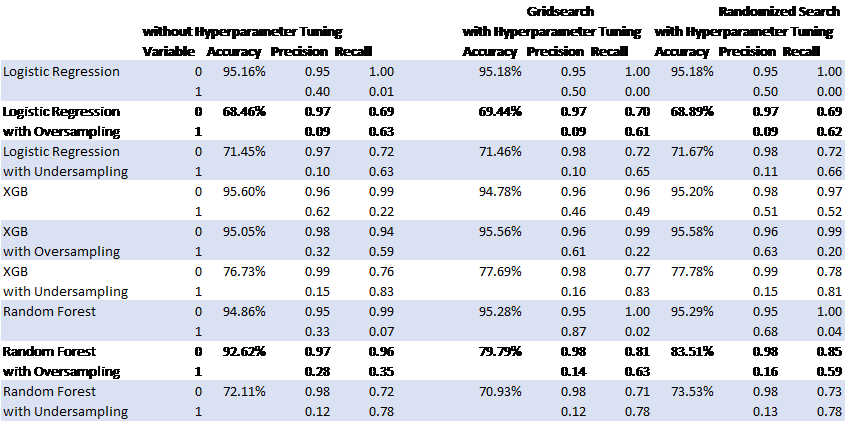

In [99]:
end = time.time()
print(end - start)

13481.211316108704


In [110]:
print (CV_rfc6)


RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=500)


## Feature Importance

In [ ]:
#
plt.figure(figsize=(20,15))
CV_xgb6.plot_importance(classifier, ax=plt.gca())

#importances = CV_rfc6.feature_importances_
#std = np.std([
#    tree.feature_importances_ for tree in CV_rfc6.estimators_], axis=0)

#forest_importances = pd.Series(importances, index=features)

#fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()